# Topic Modeling 1 -- Latent Dirichlet Allocation (LDA)

## What is topic modeling?

Topic modeling uses text-mining tool for discovery of **hidden semantic structures in a text body (corpus)**. 

### Unsupervised Machine Learning -- Latent Dirichlet Allocation

Latent Dirichlet allocation (LDA), a generative probabilistic model for collections of discrete data such as text corpora. LDA is a three-level hierarchical **Bayesian model**, in which each item of a collection is modeled as a finite mixture over an underlying set of topics. Each topic is, in turn, modeled as an infinite mixture over an underlying set of topic probabilities. In the context of text modeling, **the topic probabilities provide an explicit representation of a document**. We present efficient approximate inference techniques based on variational methods and an EM algorithm for empirical Bayes parameter estimation. 

Read the full paper: https://www.jmlr.org/papers/volume3/blei03a/blei03a.pdf

Blei, D. M., Ng, A. Y., & Jordan, M. I. (2003). Latent dirichlet allocation. Journal of machine Learning research, 3(Jan), 993-1022.

LDA discovers latent topics of a document by calculating the probability distribution of each topic in a corpus. It assumes that documents on similar topics often contain a similar group of words and the latent topics can be captured by the words with the highest possibility to frequently appear together (Hu, 2009). 

**LDA represents documents as a mixture of topics. Similarly, a topic is a mixture of words.** If a word has high probability of being in a topic, all the documents having this word will be more strongly associated with its topic as well.

>**p(word w with topic t) = p(topic t | document d) * p(word w | topic t)**

<img loading="lazy" class="alignnone" src="https://www.researchgate.net/profile/Diego-Buenano-Fernandez/publication/339368709/figure/fig1/AS:860489982689280@1582168207260/Schematic-of-LDA-algorithm.png" alt="LDA model" width="850" >

source:https://www.researchgate.net/profile/Diego-Buenano-Fernandez/publication/339368709/figure/fig1/AS:860489982689280@1582168207260/Schematic-of-LDA-algorithm.png

References:
1. Hu, D. J. (2009). Latent Dirichlet Allocation for Text, Images, and Music.
2. https://towardsdatascience.com/latent-dirichlet-allocation-lda-9d1cd064ffa2

## Advanced Text Filtering/processing

In [34]:
import pandas as pd
import re
import numpy as np

from nltk.tokenize import word_tokenize

import warnings
# To ignore all warnings that arise here to enhance clarity
warnings.filterwarnings(action='ignore', category=FutureWarning)
warnings.filterwarnings(action='ignore', category=DeprecationWarning)

In [2]:
hurricane = pd.read_csv("hurricane_ian.csv", header = 0)
hurricane.head()

,userName,screenName,userID,userLocation,user_descrip,user_url,followers,friends,user_ctime,source,post_time,tweet_id,tweet_text,favorite_count,retweet_count
0,Convenience Store News.,CStoreNews_,156666863,ORD,Top Convenience Retail Influencer Millions of ...,NaN,43224,47652,2010-06-17 15:20:29+00:00,Twitter for iPhone,2022-09-26 23:59:59+00:00,1574549376025755648,Get lost Hurricane Ian https://t.co/xsY8JlKe8h,3,0
1,Andrea Smith 🌊🐝🐶🐱🌱💙,dogparkgal,1509146276461531137,"Florida, USA",Starting over after a hack. Was @dogparkgoddes...,NaN,2456,3467,2022-03-30 12:31:39+00:00,Twitter for Android,2022-09-26 23:59:58+00:00,1574549371961544704,@SunnyPete6760 Wish us well during Hurricane I...,0,0
2,Sicilian-ShaSha 🇺🇸,shash1960,1220870146039975936,NaN,American/Italian 🇺🇸🇮🇹 #MAGAAMERICAN 🇺🇸,NaN,307,333,2020-01-25 00:45:06+00:00,Twitter for iPhone,2022-09-26 23:59:56+00:00,1574549362314723331,"Stressed about Hurricane Ian,seriously don’t w...",0,1
3,Villain Character Development 🔜 Confuror 2022,KingOfFoxxes,1054890619867410433,"Baja California, México",| 21 Y.O | Mexican 🇲🇽 | Coffe Boi ☕️ | ♣️ Life...,NaN,270,1186,2018-10-24 00:21:37+00:00,Twitter for Android,2022-09-26 23:59:54+00:00,1574549355977023488,"RT @_chaibear: ppl really telling me to ""be ca...",0,1
4,James Cooper,stratosphere53,50626909,Atlanta,Air Force Brat / Vietnam veteran / Customer...,http://t.co/5gcImzgdlS,229,582,2009-06-25 12:06:55+00:00,Twitter Web App,2022-09-26 23:59:54+00:00,1574549355176001542,RT @stratosphere53: Canada counts damage after...,0,1


In [3]:
# display the full text information
pd.set_option('display.max_colwidth', None)

In [4]:
# remove the emojis from the tweets
hurricane['tweet_text'] = hurricane['tweet_text'].apply(lambda x: x.encode('ascii', 'ignore').decode('ascii'))
# make the name simplier
tweets = hurricane['tweet_text']
# remove the links from tweets
tweets = tweets.apply(lambda x: re.split('https:\/\/.*', str(x))[0])
tweets.head()

0                                                                                                                                                                                                                                                              Get lost Hurricane Ian 
1                                                                                                                                                                                                                      @SunnyPete6760 Wish us well during Hurricane Ian! \nHey buddy! 
2    Stressed about Hurricane Ian,seriously dont want to leave my home to evacuate, but will have no choice. Tomorrow I know Ill get the order, Zone B. I evacuated for Irma, much has change for me in 5 yrs, seems overwhelming now. One thing, Im blessed to have family to go to. 
3                                                                                                                                          RT @_chaibear: ppl reall

### Before you try to remove the stopwords and useless symbols, tokenize the words, let's learn a new method

nltk.tag package
NLTK Taggers

This package contains classes and interfaces for part-of-speech tagging, or simply “tagging”.

A “tag” is a case-sensitive string that specifies some property of a token, such as its **part of speech**(pos_tag). Tagged tokens are encoded as tuples (tag, token). 

Documentations:

- http://blog.echen.me/2011/08/22/introduction-to-latent-dirichlet-allocation/
- https://www.nltk.org/book/ch05.html


>**Categorizing and tagging Words into nouns (NN), verbs (VBZ), adjectives(JJ), and adverbs (RB)**

In [6]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\rachaelx\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True

In [7]:
# let's see an example of pos_tag
from nltk.tag import pos_tag

print(pos_tag(word_tokenize("John's big idea isn't all that bad.")))

[('John', 'NNP'), ("'s", 'POS'), ('big', 'JJ'), ('idea', 'NN'), ('is', 'VBZ'), ("n't", 'RB'), ('all', 'PDT'), ('that', 'DT'), ('bad', 'JJ'), ('.', '.')]


In [8]:
import nltk
nltk.download('universal_tagset')

[nltk_data] Downloading package universal_tagset to
[nltk_data]     C:\Users\rachaelx\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\universal_tagset.zip.


True

In [9]:
print(pos_tag(word_tokenize("John's big idea isn't all that bad."), tagset='universal'))

[('John', 'NOUN'), ("'s", 'PRT'), ('big', 'ADJ'), ('idea', 'NOUN'), ('is', 'VERB'), ("n't", 'ADV'), ('all', 'DET'), ('that', 'DET'), ('bad', 'ADJ'), ('.', '.')]


>**Function to remove all the verbs (VBZ), adjectives(JJ), and adverbs (RB), only keeping nouns (NN)**

In [10]:
def nouns(text):
    '''Given a string of text, tokenize the text and pull out only the nouns.'''
    is_noun = lambda pos: pos[:2] == 'NN'
    tokenized = word_tokenize(text)
    all_nouns = [word for (word, pos) in pos_tag(tokenized) if is_noun(pos)] 
    return ' '.join(all_nouns)

In [11]:
# apply it to the tweets

tweets_nouns = tweets.apply(nouns)
tweets_nouns.head()

0                                                                           Hurricane Ian
1                                                  @ SunnyPete6760 Wish Hurricane Ian Hey
2    Hurricane Ian home choice Tomorrow Ill order Zone B. Irma change yrs thing Im family
3                                       RT ppl hurricane ian hundreds hours disaster surv
4          RT @ stratosphere53 Canada damage Fiona Cuba Florida brace storm Ian Breitbart
Name: tweet_text, dtype: object

In [12]:
# Let's get assign words a number so the python can read it
# LDA can only use raw term counts for LDA because it is a probabilistic graphical model
from sklearn.feature_extraction.text import CountVectorizer

vectorizer1 = CountVectorizer(stop_words='english')
vec1 = vectorizer1.fit_transform(tweets_nouns) 

>**Why LDA cannot use TF-IDF**

Blei (who developed LDA), points out that LDA addresses the shortcomings of the TF-IDF model and leaves this approach behind. LSA is compeltely algebraic and generally (but not necessarily) uses a TF-IDF matrix, while LDA is a probabilistic model that tries to estimate probability distributions for topics in documents and words in topics. The weighting of TF-IDF is not necessary for this.

Source:https://stackoverflow.com/questions/44781047/necessary-to-apply-tf-idf-to-new-documents-in-gensim-lda-model/44789327#44789327

>**Appendix**

Latent Semantic Analysis (LSA) and Latent Dirichlet Allocation (LDA) area good approaches to deal with NLP problems. Both LSA and LDA have same input which is Bag of words in matrix format. LSA focus on reducing matrix dimension while LDA solves topic modeling problems.

Source:https://towardsdatascience.com/2-latent-methods-for-dimension-reduction-and-topic-modeling-20ff6d7d547#:~:text=LSA%20focus%20on%20reducing%20matrix%20dimension%20while%20LDA%20solves%20topic%20modeling%20problems.

In [13]:
#Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.LatentDirichletAllocation.html
from sklearn.decomposition import LatentDirichletAllocation

# set the topic modeling model
lda = LatentDirichletAllocation(n_components = 10, # meaning the number of topics, by default is 10
                                random_state=0)

# train the model using unlabeled data
LDAmodel1 = lda.fit(vec1)

The components_ attribute of the lda instance, which stores a matrix containing the word importance (here, 1530) for each of the 10 topics in increasing order:

In [14]:
print(LDAmodel1.components_.shape)

(10, 1528)


In [15]:
#Enumerate() method adds a counter to an iterable and returns it in a form of enumerating object.
#https://www.geeksforgeeks.org/enumerate-in-python/
print(list(enumerate(LDAmodel1.components_)))

[(0, array([0.1       , 0.1       , 0.1       , ..., 1.09999604, 0.1       ,
       1.0999916 ])), (1, array([0.1, 1.1, 0.1, ..., 0.1, 0.1, 0.1])), (2, array([0.1, 0.1, 0.1, ..., 0.1, 0.1, 0.1])), (3, array([1.1       , 0.1       , 1.1       , ..., 0.1000032 , 1.1       ,
       6.09999701])), (4, array([0.1       , 0.1       , 0.1       , ..., 0.1       , 0.1       ,
       0.10000411])), (5, array([0.1, 0.1, 0.1, ..., 0.1, 0.1, 0.1])), (6, array([0.1       , 0.1       , 0.1       , ..., 1.09997135, 0.1       ,
       0.10000521])), (7, array([0.1       , 0.1       , 0.1       , ..., 5.10002941, 0.1       ,
       0.1       ])), (8, array([0.1, 0.1, 0.1, ..., 0.1, 0.1, 0.1])), (9, array([0.1       , 0.1       , 0.1       , ..., 0.1       , 0.1       ,
       0.10000207]))]


In [16]:
# get the indices and values using enumerate method
#https://www.geeksforgeeks.org/how-to-access-index-in-pythons-for-loop/
for topic_idx, x in enumerate(LDAmodel1.components_):
    print("Topic %d:" % (topic_idx + 1))#The %d operator is used as a placeholder to specify integer values, decimals, or numbers.
    print(x)

Topic 1:
[0.1        0.1        0.1        ... 1.09999604 0.1        1.0999916 ]
Topic 2:
[0.1 1.1 0.1 ... 0.1 0.1 0.1]
Topic 3:
[0.1 0.1 0.1 ... 0.1 0.1 0.1]
Topic 4:
[1.1        0.1        1.1        ... 0.1000032  1.1        6.09999701]
Topic 5:
[0.1        0.1        0.1        ... 0.1        0.1        0.10000411]
Topic 6:
[0.1 0.1 0.1 ... 0.1 0.1 0.1]
Topic 7:
[0.1        0.1        0.1        ... 1.09997135 0.1        0.10000521]
Topic 8:
[0.1        0.1        0.1        ... 5.10002941 0.1        0.1       ]
Topic 9:
[0.1 0.1 0.1 ... 0.1 0.1 0.1]
Topic 10:
[0.1        0.1        0.1        ... 0.1        0.1        0.10000207]


In [17]:
feature_names1 = vectorizer1.get_feature_names() #get_feature_names_out() if cannot found
feature_names1[:20]

['0423',
 '14mb',
 '19',
 '542',
 '965mb',
 '966mb',
 '_private_idaho',
 '_thirunarayan1',
 'aaronparnas',
 'ab',
 'abc',
 'abccolumbia',
 'absolute',
 'access',
 'accuwe',
 'accuweather',
 'act',
 'action',
 'activities',
 'actor']

In [18]:
# how to get the feature names
# check the documentation:https://scikit-learn.org/stable/auto_examples/applications/plot_topics_extraction_with_nmf_lda.html#sphx-glr-auto-examples-applications-plot-topics-extraction-with-nmf-lda-py
n_top_words = 5

for topic_idx, topic in enumerate(LDAmodel1.components_):
    print("Topic %d:" % (topic_idx + 1))#The %d operator is used as a placeholder to specify integer values, decimals, or numbers.
    print(" ".join([feature_names1[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))

Topic 1:
hurricane rt ian way tampa
Topic 2:
ian hurricane rt course boo
Topic 3:
rt hurricane ian desantis sea
Topic 4:
hurricane ian rt track tropicalupdate
Topic 5:
hurricane ian rt florida storm
Topic 6:
hurricane ian rt florida emergency
Topic 7:
ian hurricane rt tampa florida
Topic 8:
hurricane ian rt florida week
Topic 9:
hurricane ian people cuba rt
Topic 10:
rt trump occupydemocrats president biden


In [19]:
# build a function to display the topics
def display_topics(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx + 1)) 
        print(" ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])) 

In [20]:
lda_topics1 = display_topics(LDAmodel1, feature_names1, n_top_words=15)
print(lda_topics1)

Topic 1:
hurricane rt ian way tampa bay winds powers weaken case planning b_resnick forecas regional council
Topic 2:
ian hurricane rt course boo middle panic tennessee pl tampa mph winds update cuba bay
Topic 3:
rt hurricane ian desantis sea impacts thehill area house response white bryanwx politics ron infrastructure
Topic 4:
hurricane ian rt track tropicalupdate latest nhc mar new lago advisory intermediate path just cuba
Topic 5:
hurricane ian rt florida storm surge warnings governor breaking tampa desantis bay marthas vineyard coast
Topic 6:
hurricane ian rt florida emergency funds joe biden nousefortrump request chiefs bucs impact nfl sunday
Topic 7:
ian hurricane rt tampa florida week buccaneers tuesday monday afternoon looming adamschefter coast scenario forecast
Topic 8:
hurricane ian rt florida week cuba gulf landfall way friday mexico space station international storm
Topic 9:
hurricane ian people cuba rt family prayers thoughts charliecrist landf karla risk winds rainfall c

In [21]:
# let's add more stopwords.
#add the stop words and the words that you want to exclude
from sklearn.feature_extraction import text

add_stop_words = ['hurricane','ian','rt']
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

In [22]:
# build a new vectorizer removing the new list of stopwords
vectorizer2 = CountVectorizer(stop_words=stop_words)
vec2 = vectorizer2.fit_transform(tweets_nouns) 
feature_names2 = vectorizer2.get_feature_names() #get_feature_names_out() if cannot found
feature_names2[:5]

['0423', '14mb', '19', '542', '965mb']

In [23]:
# hyperparameter tuning
lda2 = LatentDirichletAllocation(n_components = 10, learning_method='online', learning_offset=50,
                                random_state=0)

# Build the model using unlabeled data
LDAmodel2 = lda2.fit(vec2)

lda_topics2 = display_topics(LDAmodel2, feature_names2, n_top_words=15)
print(lda_topics2)

Topic 1:
tuesday week buccaneers tampa afternoon looming adamschefter school hey officials monday vengolor ther staying friday
Topic 2:
florida emergency funds joe biden nousefortrump request amp floridians state ians hurricanes fl st weather
Topic 3:
florida disaster governor world disney walt mar lago doggintrump dear repeat caribbean georgia intensifying stuostro
Topic 4:
way path advisory rain florida night intermediate landfall powers friday weaken week eye kirstiealley makeianweak
Topic 5:
course boo florida authorities plan charliecrist house response white desantis thehill politics dailycaller women servicemen
Topic 6:
track desantis tropicalupdate marthas vineyard governor doc_chimpanzee breaking latest nhc new satellite afternoon look state
Topic 7:
tampa bay florida gulf cuba coast area warning storm miami forecast mexico national case hurricanes
Topic 8:
trump occupydemocrats president biden politics breaking resources pinellas sarasota effect mar hillsborough mon amp count

>**Function to remove all the verbs (VBZ), and adverbs (RB), keeping nouns (NN) and adjectives(JJ)**

In [24]:
def nouns_adj(text):
    '''Given a string of text, tokenize the text and pull out only the nouns and adjectives.'''
    is_noun_adj = lambda pos: pos[:2] == 'NN' or pos[:2] == 'JJ'
    tokenized = word_tokenize(text)
    nouns_adj = [word for (word, pos) in pos_tag(tokenized) if is_noun_adj(pos)] 
    return ' '.join(nouns_adj)

In [25]:
# apply to tweets
tweets_nouns_adj = tweets.apply(nouns_adj)

# we will continue use the same vectorizer, since we didn't change the parameters
# vectorizer2 = CountVectorizer(stop_words=stop_words)
vec3 = vectorizer2.fit_transform(tweets_nouns_adj) 
feature_names3 = vectorizer2.get_feature_names()

# Build the model using the parameters from lda2
LDAmodel3 = lda2.fit(vec3)

lda_topics3 = display_topics(LDAmodel3, feature_names3, n_top_words = 15)
print(lda_topics3)

Topic 1:
area impact advisory west panic middle pl tennessee intermediate major chiefs evacuations nfl bucs mandatory
Topic 2:
news nasa florida emergency funds good joe nousefortrump request biden artemis bad lorengrush sls amp
Topic 3:
amp florida effect pinellas mon cuba est warnings counties hillsborough manatee flsert sarasota days miami
Topic 4:
trump biden occupydemocrats president politics federal breaking resources school update amp tomorrow hurricaneian proud youre
Topic 5:
florida authorities plan mar local charliecrist lago just trump sharpie nothoodlum hurricanes hey path ther
Topic 6:
tampa week tuesday buccaneers friday house afternoon looming adamschefter white thehill response school night politics
Topic 7:
storm florida surge tampa bay winds coast category warnings worst gulf national cuba west warning
Topic 8:
track latest tropicalupdate nhc new satellite big florida rain afternoon caribbean look week disney walt
Topic 9:
desantis vineyard marthas governor breaking d

# Interactive Visualization -- Intertopic Distance Map

The intertopic distance map is a visualization of the topics in a two-dimensional space . The area of these topic circles is proportional to the amount of words that belong to each topic across the dictionary. The circles are plotted using a multidimensional scaling algorithm (converts a bunch of dimension, more than we can conceive with our human brains, to a reasonable number of dimensions, like two) based on the words they comprise, so topics that are closer together have more words in common.

source:https://community.alteryx.com/t5/Data-Science/Getting-to-the-Point-with-Topic-Modeling-Part-3-Interpreting-the/ba-p/614992

Read the full paper:https://nlp.stanford.edu/events/illvi2014/papers/sievert-illvi2014.pdf

Reference:Sievert, C., & Shirley, K. (2014, June). LDAvis: A method for visualizing and interpreting topics. In Proceedings of the workshop on interactive language learning, visualization, and interfaces (pp. 63-70).

intall pyLDAvis

! pip install pyLDAvis

https://anaconda.org/conda-forge/pyldavis

In [28]:
import pyLDAvis
import pyLDAvis.sklearn

pyLDAvis.enable_notebook()
vis_data1 = pyLDAvis.sklearn.prepare(LDAmodel1, vec1, vectorizer1, mds='tsne')#The output approximates the distance between topics.
pyLDAvis.display(vis_data1)

In [30]:
# build the Intertopic Distance Map using LDAmodel2
# will generate an error
# AssertionError: Term frequencies and vocabulary are of different sizes, 1527 != 1725.
pyLDAvis.enable_notebook()
vis_data2 = pyLDAvis.sklearn.prepare(LDAmodel2, vec2, vectorizer2, mds='tsne')#The output approximates the distance between topics.
pyLDAvis.display(vis_data2)

AssertionError: Term frequencies and vocabulary are of different sizes, 1525 != 1723.

In [31]:
pyLDAvis.enable_notebook()
vis_data3 = pyLDAvis.sklearn.prepare(LDAmodel3, vec3, vectorizer2, mds='tsne')#The output approximates the distance between topics.
pyLDAvis.display(vis_data3)

# LDA -- Gensim 

**Besides SKLEARN we can use Gensim to conduct the LDA as well.** This module allows both LDA model estimation from a training corpus and inference of topic distribution on new, unseen documents. The model can also be updated with new documents for online training.

Documentation:https://radimrehurek.com/gensim/models/ldamodel.html

Install gensim

! pip install gensim

https://anaconda.org/conda-forge/gensim

In [36]:
#create a dictionary contains all the words instead of using words' ids
from gensim import corpora

#vectorizer2 = CountVectorizer(stop_words=stop_words)
#vec2 = vectorizer2.fit_transform(tweets_nouns) 
#feature_names2 = vectorizer2.get_feature_names()

dictionary2 = corpora.Dictionary([feature_names2]) 

In [37]:
# using Gensim to build LDA model
from gensim.matutils import Sparse2Corpus
from gensim.models import ldamodel

#vec2 = vectorizer2.fit_transform(tweets_nouns) 
corpus2 = Sparse2Corpus(vec2) #Convert a matrix in scipy.sparse format into a streaming gensim corpus.

gen_lda2 = ldamodel.LdaModel(corpus=corpus2, num_topics=10, id2word=dictionary2) #if you don't have this parameter, it will only show the words' ids

gen_lda2.print_topics(num_words=10)

[(0,
  '0.011*"crypto" + 0.011*"myles" + 0.009*"larry" + 0.008*"girder" + 0.008*"gop" + 0.008*"gymmyjay" + 0.007*"mets" + 0.007*"lorengrush" + 0.007*"hair" + 0.007*"hope"'),
 (1,
  '0.008*"hoa" + 0.007*"mischievousliz" + 0.006*"katrina" + 0.006*"jury" + 0.005*"ccvagina" + 0.005*"irma" + 0.005*"cc_stormwatch" + 0.005*"jamaica" + 0.005*"noaa42" + 0.005*"market"'),
 (2,
  '0.010*"louiseamd" + 0.009*"dropsonde" + 0.009*"kms" + 0.009*"estimations" + 0.008*"currently" + 0.007*"bay" + 0.007*"feet" + 0.007*"nwsdirector" + 0.007*"nwseastern" + 0.006*"faces"'),
 (3,
  '0.023*"nose" + 0.010*"man" + 0.010*"big" + 0.010*"moniker" + 0.010*"gul" + 0.008*"19" + 0.008*"fgbrisco" + 0.008*"melania" + 0.006*"baja" + 0.006*"alachuajury"'),
 (4,
  '0.007*"medway" + 0.006*"inland" + 0.006*"cities" + 0.006*"aknewsnow" + 0.006*"buccaneers" + 0.006*"family" + 0.006*"fineartamerica" + 0.006*"kolonehusky" + 0.006*"leaderbookfl" + 0.006*"idk"'),
 (5,
  '0.012*"delivered" + 0.009*"joe" + 0.008*"coverage" + 0.008*"n

In [38]:
#vec3 = vectorizer2.fit_transform(tweets_nouns_adj)

dictionary3 = corpora.Dictionary([feature_names3]) 

corpus3 = Sparse2Corpus(vec3) 

gen_lda3 = ldamodel.LdaModel(corpus=corpus3, num_topics=10, id2word=dictionary3) 

gen_lda3.print_topics(num_words=10)

[(0,
  '0.012*"gainesville" + 0.010*"health" + 0.010*"marthas" + 0.009*"buildings" + 0.009*"clinic" + 0.008*"balloons" + 0.008*"max" + 0.008*"karine" + 0.008*"famous" + 0.008*"impactfu"'),
 (1,
  '0.007*"campground" + 0.007*"gulf" + 0.007*"admitting" + 0.007*"easy" + 0.007*"delraybeach" + 0.007*"increased" + 0.007*"closest" + 0.007*"closure" + 0.007*"emergency" + 0.007*"mr_jce"'),
 (2,
  '0.012*"needs" + 0.008*"embedded" + 0.008*"eliotjacobson" + 0.008*"doc_chimpanzee" + 0.008*"ians" + 0.008*"floridastate" + 0.008*"command" + 0.007*"careful" + 0.007*"defencehq" + 0.007*"davidpsamson"'),
 (3,
  '0.012*"efforts" + 0.009*"arrival" + 0.008*"levels" + 0.008*"gdarkconrad" + 0.008*"lardo" + 0.007*"letter" + 0.007*"gusty" + 0.007*"disney" + 0.007*"dms" + 0.006*"coachtatur84"'),
 (4,
  '0.013*"insider" + 0.009*"littleelvis40" + 0.008*"accuwe" + 0.007*"day" + 0.006*"families" + 0.006*"lessons" + 0.006*"latest" + 0.006*"ia" + 0.006*"fiona" + 0.006*"afb"'),
 (5,
  '0.009*"isnt" + 0.007*"lifetime" 

### Intertopic Distance Map for Gensim models

In [44]:
import pyLDAvis.gensim_models as gensimvis

pyLDAvis.enable_notebook()
gensimvis.prepare(gen_lda2, corpus2, dictionary2, sort_topics=False)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.023864 -0.017628       1        1   7.496585
1     -0.111296 -0.091172       2        1  13.327440
2      0.048312 -0.015427       3        1   7.968152
3     -0.140507  0.023848       4        1   9.933850
4      0.141300  0.061724       5        1  10.743309
5      0.041502  0.017777       6        1   7.826870
6     -0.017377 -0.064055       7        1   8.057349
7      0.105586 -0.059985       8        1  15.746644
8      0.016115 -0.026997       9        1   9.945434
9     -0.059770  0.171916      10        1   8.954368, topic_info=               Term       Freq      Total Category  logprob  loglift
901            nose  17.000000  17.000000  Default  30.0000  30.0000
672           jails  11.000000  11.000000  Default  29.0000  29.0000
414      evacuation  14.000000  14.000000  Default  28.0000  28.0000
332       delivered   7.000000   7.000000  Default  27.0000  27.0000
255         coastal   8.000000   8.000000  Default  26.0000  26.0000
..              ...        ...        ...      ...      ...      ...
604             hpa   2.723505   7.819310  Topic10  -5.3544   1.3584
948         outlook   2.902473  15.630278  Topic10  -5.2908   0.7294
981          people   2.724848   8.052318  Topic10  -5.3539   1.3295
743  lhps_athletics   2.724207  13.692215  Topic10  -5.3541   0.7984
699           kasie   2.724155   8.051396  Topic10  -5.3542   1.3293

[482 rows x 6 columns], token_table=      Topic      Freq           Term
term                                
2         1  0.203522             19
2         2  0.101761             19
2         4  0.508806             19
2         6  0.101761             19
4         2  0.129511          965mb
...     ...       ...            ...
998       4  0.187685  pinellasclerk
998       6  0.187685  pinellasclerk
998       7  0.093843  pinellasclerk
998       9  0.093843  pinellasclerk
998      10  0.093843  pinellasclerk

[1233 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

In [45]:
pyLDAvis.enable_notebook()
gensimvis.prepare(gen_lda3, corpus3, dictionary3, sort_topics=False)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.016562 -0.008698       1        1   6.303102
1     -0.064363  0.013972       2        1  11.429440
2      0.010473 -0.125055       3        1   6.934334
3     -0.181100  0.008116       4        1  11.296110
4      0.034897  0.106162       5        1   9.838122
5      0.104253 -0.020665       6        1  21.952538
6      0.009006  0.128585       7        1   7.858929
7     -0.077064 -0.053490       8        1   9.587277
8      0.117836 -0.017709       9        1   7.499872
9      0.029501 -0.031218      10        1   7.300277, topic_info=              Term       Freq      Total Category  logprob  loglift
901         matter  23.000000  23.000000  Default  30.0000  30.0000
587    gdarkconrad  12.000000  12.000000  Default  29.0000  29.0000
438        efforts  18.000000  18.000000  Default  28.0000  28.0000
440       embedded  12.000000  12.000000  Default  27.0000  27.0000
743        insider  21.000000  21.000000  Default  26.0000  26.0000
..             ...        ...        ...      ...      ...      ...
300      community   2.398669   8.070679  Topic10  -5.4081   1.4039
617  granddaughter   2.385082   8.080130  Topic10  -5.4138   1.3971
343       damaging   2.699753  12.923446  Topic10  -5.2899   1.0514
822        largest   2.415319   9.032080  Topic10  -5.4012   1.2983
743        insider   2.395038  21.905404  Topic10  -5.4096   0.4039

[485 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
2         2  0.081663       14mb
2         4  0.326653       14mb
2         5  0.163327       14mb
2         6  0.244990       14mb
2         7  0.163327       14mb
...     ...       ...        ...
998       3  0.087227  neighbors
998       5  0.087227  neighbors
998       6  0.087227  neighbors
998       8  0.523364  neighbors
998      10  0.087227  neighbors

[1384 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

# Selecting the best k topics for gensim models

In [46]:
# Using coherencemodel to calculate the best k topics
# documentation:https://radimrehurek.com/gensim/models/coherencemodel.html
from gensim.models.coherencemodel import CoherenceModel

In [47]:
# setting random seed to get the same results each time for different topic sizes. 
np.random.seed(1)

coherence2 = []

for k in range(2, 11):
    goodLdaModel2 = ldamodel.LdaModel(
        corpus=corpus2, id2word=dictionary2, num_topics=k, passes=50) #Number of passes through the corpus during training.
    
    goodcm2 = CoherenceModel(model=goodLdaModel2, corpus=corpus2,
                            dictionary=dictionary2, coherence='u_mass') #The greater the number, the better is coherence score.
    
    coherence2.append(goodcm2.get_coherence())
    

print(coherence2)

[-16.363279662769756, -17.645539471139745, -16.59840376181339, -15.190569782340578, -15.523199331833007, -14.708335370812863, -15.584907963839447, -14.93064387115519, -13.371707165024592]


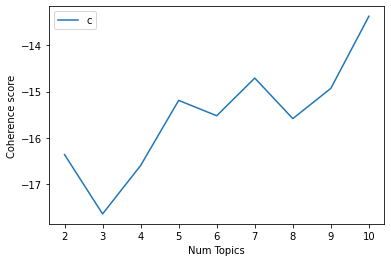

In [48]:
# Show graph
import matplotlib.pyplot as plt

x = range(2,11)
plt.plot(x, coherence2)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [49]:
# print the best model for corpus2
gen_lda_best2 = ldamodel.LdaModel(corpus=corpus2, num_topics=10, id2word=dictionary2, passes=50) 

gen_lda_best2.print_topics(num_words=10)

[(0,
  '0.018*"larry" + 0.014*"categories" + 0.014*"pass" + 0.012*"hurri" + 0.012*"dada" + 0.012*"fuck" + 0.012*"officials" + 0.012*"district" + 0.012*"gail" + 0.011*"heads"'),
 (1,
  '0.020*"melania" + 0.019*"coastal" + 0.019*"map" + 0.019*"jackson_dill" + 0.017*"coverage" + 0.015*"finale" + 0.015*"floridians" + 0.014*"birdingpeepwx" + 0.014*"jamesblatch" + 0.014*"greg_magnuson"'),
 (2,
  '0.019*"evacuation" + 0.018*"outlook" + 0.016*"pinellas" + 0.014*"jean" + 0.014*"braces" + 0.012*"high" + 0.011*"fighters" + 0.011*"equipment" + 0.011*"delivered" + 0.011*"areas"'),
 (3,
  '0.026*"lhps_athletics" + 0.019*"myles" + 0.017*"louiseamd" + 0.015*"desktop" + 0.014*"cc_stormwatch" + 0.014*"increases" + 0.012*"chart" + 0.012*"nhc" + 0.012*"forecasters" + 0.012*"image"'),
 (4,
  '0.012*"moniker" + 0.012*"big" + 0.012*"gul" + 0.012*"man" + 0.011*"joe" + 0.010*"doggintrump" + 0.009*"independent" + 0.009*"conti" + 0.009*"philklotzbach" + 0.009*"patients"'),
 (5,
  '0.008*"cecilytynan" + 0.006*"hu

In [ ]:
pyLDAvis.enable_notebook()
gensimvis.prepare(gen_lda_best2, corpus2, dictionary2, sort_topics=False)

In [ ]:
# find the best k topic for corpus3
np.random.seed(1)

coherence3 = []

for k in range(2, 11):
    goodLdaModel3 = ldamodel.LdaModel(
        corpus=corpus3, id2word=dictionary3, num_topics=k, passes=50) #Number of passes through the corpus during training.
    
    goodcm3 = CoherenceModel(model=goodLdaModel3, corpus=corpus3,
                            dictionary=dictionary3, coherence='u_mass') #The greater the number, the better is coherence score.
    
    coherence3.append(goodcm3.get_coherence())
    

print(coherence3)

In [ ]:
# Show graph
import matplotlib.pyplot as plt

x = range(2,11)
plt.plot(x, coherence3)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
# print the best model for corpus3
gen_lda_best3 = ldamodel.LdaModel(corpus=corpus3, num_topics=8 , id2word=dictionary3, passes=50) 

gen_lda_best3.print_topics(num_words=10)

In [ ]:
pyLDAvis.enable_notebook()
gensimvis.prepare(gen_lda_best3, corpus3, dictionary3, sort_topics=False)

# Apendix

>**For more evaluation method, please read**

https://www.baeldung.com/cs/topic-modeling-coherence-score

**There is no one way to determine whether the coherence score is good or bad. The score and its value depend on the data that it’s calculated from.**

# Actions: discover the movie topics

1. You need build the LDA model using IMDB Dataset ("IMDB Dataset.csv"), you can decide the number of topics and top words
2. Apply two methods to select your corpus (nouns, nouns and adjectvies)
3. Visualize your topic modeling results
4. Select the best Gensim model then visualize the results